<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Lewandowski/Regresje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import absolute

from matplotlib import pyplot

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

In [2]:

#load data
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
X = pd.DataFrame(data = housing.data, columns = housing.feature_names)
print(X.head())
y = housing.target


(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [3]:
x_train, x_test, y_train, y_test = train_test_split( X[['HouseAge',	'AveRooms',	'AveBedrms',	'Population',	'AveOccup',	'Latitude',	'Longitude']], X['MedInc'], test_size=0.33, random_state=42)

In [4]:
reg = LinearRegression().fit(x_train, y_train)
y_przewidywania =reg.predict(x_test)

In [5]:
y_prawdziwe = y_test
print("regresja liniowa", r2_score(y_prawdziwe,y_przewidywania))

regresja liniowa 0.5933626198838555


In [6]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', MinMaxScaler()),  # Scale features
    ('regressor', LinearRegression())
])

# Fit the polynomial regression model
poly_reg.fit(x_train, y_train)

# Predict
y_pred_poly = poly_reg.predict(x_test)

# Evaluate the model
print("Polynomial Regression (degree 2):", r2_score(y_test, y_pred_poly))

Polynomial Regression (degree 2): 0.6472234044258838


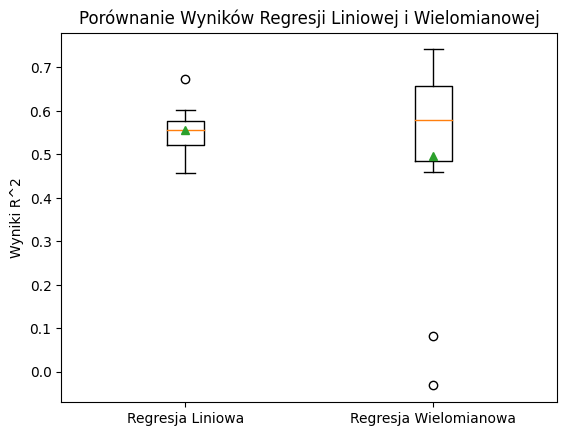

In [7]:
# Wyniki regresji liniowej
scores_lin = cross_val_score(reg, X[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']], X['MedInc'], cv=10, scoring='r2')

# Wyniki regresji wielomianowej
scores_poly = cross_val_score(poly_reg, X[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']], X['MedInc'], cv=10, scoring='r2')

# Tworzenie wykresu pudełkowego
pyplot.boxplot([scores_lin, scores_poly], labels=['Regresja Liniowa', 'Regresja Wielomianowa'], showmeans=True)
pyplot.ylabel('Wyniki R^2')
pyplot.title('Porównanie Wyników Regresji Liniowej i Wielomianowej')
pyplot.show()

In [8]:
X


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
